In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pwd
!ls

/content
drive  sample_data


In [3]:
import os
os.chdir("/content/drive/MyDrive/proyecto2/TIFF3")
!ls

SanFrasico_banda2020_11_29_12.tif  SanFrasico_banda2020_2_3_3.tif
SanFrasico_banda2020_1_14_2.tif    SanFrasico_banda2020_3_4_6.tif
SanFrasico_banda2020_12_4_13.tif   SanFrasico_banda2020_6_7_7.tif
SanFrasico_banda2020_1_4_0.tif	   SanFrasico_banda2020_8_11_8.tif
SanFrasico_banda2020_1_9_1.tif	   SanFrasico_banda2020_8_31_9.tif
SanFrasico_banda2020_2_13_4.tif    SanFrasico_banda2020_9_10_11.tif
SanFrasico_banda2020_2_18_5.tif    SanFrasico_banda2020_9_5_10.tif


In [4]:
from PIL import Image
import urllib.request

import ee # Google Earth Engine
from os import system

In [5]:
 import ee
 ee.Authenticate()
 ee.Initialize(project='ee-santiagobautista2346')

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [6]:
%pwd

'/content/drive/MyDrive/proyecto2/TIFF3'

In [34]:
import urllib.request
from PIL import Image
import ee

# Inicializamos la API de Earth Engine (si no está inicializada)
ee.Initialize()

def sentinel2(start_date, end_date, geometry, imageVisParam):
    IMGSentinel = ee.ImageCollection('COPERNICUS/S2_SR') \
                  .filterDate(start_date, end_date) \
                  .filterBounds(geometry) \
                  .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'Less_Than', 30)
    print("size: ", IMGSentinel.size().getInfo())

    collectionList = IMGSentinel.toList(IMGSentinel.size())
    collectionSize = collectionList.size().getInfo()

    imgs = []
    fechas = []
    for i in range(collectionSize):
        SentinelFiltro = ee.Image(collectionList.get(i))
        SentinelClip = SentinelFiltro.clip(geometry)

        # Extraemos las bandas sin visualización, simplemente como imagen multibanda
        imagen = SentinelClip.select([ "B2", "B3","B4", "B5", "B6", "B7", "B8"])

        # Obtener la URL de la imagen para descargarla
        url = imagen.getDownloadURL({
            'scale': 10,  # Resolución espacial más alta (10 metros por píxel)
            'region': geometry,  # Región de interés
            'format': 'GeoTIFF',  # Formato de archivo GeoTIFF
            'crs': 'EPSG:4326',  # Sistema de coordenadas geográficas
            'maxPixels': 1e8  # Aumentar el límite de píxeles para una descarga más grande si es necesario
        })
        print(ee.Date(ee.Image(collectionList.get(i)).get('system:time_start')).format('Y-M-d').getInfo())

        imgs.append(url)  # Guardar la URL para la descarga
        fechas.append(ee.Date(ee.Image(collectionList.get(i)).get('system:time_start')).format('Y-M-d').getInfo())
    return (imgs, fechas)

def download_image(list_imagenRGB, rutaImg, extension, view_url=False):
    for i, url in enumerate(list_imagenRGB):
        try:
            if view_url:
                print(url)  # Mostrar la URL de descarga

            # Descargar el archivo GeoTIFF
            response = urllib.request.urlopen(url)
            with open(rutaImg[i], 'wb') as f:
                f.write(response.read())

            print("Estatus de la descarga: ", True)
        except Exception as e:
            print("Error en la descarga:", e)
            print("Estatus de la descarga: ", False)

geometry_SanFrasico = ee.Geometry.MultiPolygon(
    [[[-74.29564539020495,4.963982554878391],
      [-74.2828137022777,4.963982554878391],
      [-74.2828137022777,4.97945945912525],
      [-74.29564539020495,4.97945945912525],
      [-74.29564539020495,4.963982554878391]]],
    None, False)

# Parámetros de visualización para tres bandas (pero no afecta la descarga de imágenes multibanda)
imageVisParam = {"bands": ["B4", "B3", "B2"], "min": 0, "max": 5000}

# Fechas y extensión para la descarga
start_date = '2020-01-01'
end_date = '2020-12-28'
ext = 'tif'  # Formato TIFF

# Llamada a la función para obtener las imágenes de Sentinel-2
img_sat, fechas = sentinel2(start_date, end_date, geometry_SanFrasico, imageVisParam)

# Crear nombres para las imágenes de salida, incluyendo fechas y bandas seleccionadas
output_img = ['SanFrasico_banda' + fecha.replace('-', '_') + "_" + str(i) + '.' + ext for i, fecha in enumerate(fechas)]

# Descargar y guardar las imágenes multibanda (con todas las bandas seleccionadas)
download_image(img_sat, output_img, ext, view_url=True)

size:  14
2020-1-4
2020-1-9
2020-1-14
2020-2-3
2020-2-13
2020-2-18
2020-3-4
2020-6-7
2020-8-11
2020-8-31
2020-9-5
2020-9-10
2020-11-29
2020-12-4
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/82a15a0dacfb3f7db1a2dd3fc6be01dc-c3ce31183eff6257b11660ab2f81b7f7:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/accb7008d377cf1ed243e78ce988d49e-2450d0cab906e891471d86fa01b55a12:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/c9c53d8d34e91befbe8a5c493e4c0e4f-10d16e83ec21637b8efbe0e6aae4df36:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/414996d213bdbbc4f6224062bc47b67a-3ab0bb572a2e33064ff0cdb4f0b02080:getPixels
Estatus de la descarga:  True
https://earthengine.googleapis.com/v1/projects/ee-santiagobautista2346/thumbnails/8af69e58cbfd699f6e0fc

In [7]:
!pip install rasterio numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 71.0 MB/s eta 0:00:00


In [8]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

In [9]:
imagen_satelital = rasterio.open(r"/content/drive/MyDrive/proyecto2/TIFF3/SanFrasico_banda2020_2_13_4.tif")

In [10]:
banda_azul = imagen_satelital.read(2)
banda_azul_norm = banda_azul / banda_azul.max()
banda_azul_norm

array([[0.11365878, 0.11094675, 0.11365878, ..., 0.11883629, 0.09344181,
        0.10207101],
       [0.12401381, 0.11365878, 0.09911243, ..., 0.11637081, 0.09220907,
        0.11316568],
       [0.11415187, 0.09935897, 0.08530572, ..., 0.12746548, 0.12475345,
        0.13436884],
       ...,
       [0.08086785, 0.09566075, 0.10281065, ..., 0.1035503 , 0.09738659,
        0.08703156],
       [0.10034517, 0.10059172, 0.08284024, ..., 0.07741617, 0.07963511,
        0.07667653],
       [0.10700197, 0.09960552, 0.09960552, ..., 0.07914201, 0.0882643 ,
        0.07569034]])

In [11]:
banda_verde = imagen_satelital.read(3)
banda_verde_norm = banda_verde / banda_verde.max()
banda_verde_norm

array([[0.06682927, 0.06658537, 0.06682927, ..., 0.07390244, 0.05731707,
        0.06243902],
       [0.07195122, 0.07195122, 0.05731707, ..., 0.08634146, 0.06268293,
        0.08097561],
       [0.08780488, 0.07      , 0.05146341, ..., 0.09682927, 0.08609756,
        0.10292683],
       ...,
       [0.04804878, 0.05390244, 0.05609756, ..., 0.0602439 , 0.06341463,
        0.05634146],
       [0.05463415, 0.05268293, 0.05170732, ..., 0.05292683, 0.05487805,
        0.0502439 ],
       [0.05292683, 0.05195122, 0.05219512, ..., 0.04609756, 0.05829268,
        0.05439024]])

In [12]:
banda_rojo = imagen_satelital.read(4)
banda_rojo_norm = banda_rojo / banda_rojo.max()
banda_rojo_norm

array([[0.25272109, 0.25272109, 0.21496599, ..., 0.24863946, 0.24863946,
        0.2170068 ],
       [0.25272109, 0.25272109, 0.21496599, ..., 0.26122449, 0.26122449,
        0.27006803],
       [0.26564626, 0.26564626, 0.21156463, ..., 0.26122449, 0.26122449,
        0.27006803],
       ...,
       [0.23231293, 0.23231293, 0.23639456, ..., 0.22108844, 0.22108844,
        0.15306122],
       [0.24013605, 0.24013605, 0.24319728, ..., 0.18469388, 0.18469388,
        0.16768707],
       [0.24013605, 0.24013605, 0.24319728, ..., 0.18469388, 0.18469388,
        0.16768707]])

In [13]:
banda_infrarojo = imagen_satelital.read(5)
banda_infrarojo_norm = banda_infrarojo / banda_infrarojo.max()
banda_infrarojo_norm

array([[0.53479412, 0.53479412, 0.47748615, ..., 0.5376836 , 0.5376836 ,
        0.47796773],
       [0.53479412, 0.53479412, 0.47748615, ..., 0.53094149, 0.53094149,
        0.49843487],
       [0.41825187, 0.41825187, 0.47363352, ..., 0.53094149, 0.53094149,
        0.49843487],
       ...,
       [0.58752709, 0.58752709, 0.58680472, ..., 0.52251385, 0.52251385,
        0.42234529],
       [0.59041657, 0.59041657, 0.54057308, ..., 0.47748615, 0.47748615,
        0.41656634],
       [0.59041657, 0.59041657, 0.54057308, ..., 0.47748615, 0.47748615,
        0.41656634]])

In [14]:
banda_swir1 = imagen_satelital.read(6)
banda_swir1_norm = banda_swir1 / banda_swir1.max()
banda_swir1_norm

array([[0.62972399, 0.62972399, 0.54670913, ..., 0.52675159, 0.52675159,
        0.55053079],
       [0.62972399, 0.62972399, 0.54670913, ..., 0.55498938, 0.55498938,
        0.55477707],
       [0.46857749, 0.46857749, 0.54055202, ..., 0.55498938, 0.55498938,
        0.55477707],
       ...,
       [0.67048832, 0.67048832, 0.64246285, ..., 0.57537155, 0.57537155,
        0.50615711],
       [0.65944798, 0.65944798, 0.59745223, ..., 0.54989384, 0.54989384,
        0.49957537],
       [0.65944798, 0.65944798, 0.59745223, ..., 0.54989384, 0.54989384,
        0.49957537]])

In [15]:
banda_swir2 = imagen_satelital.read(7)
banda_swir2_norm = banda_swir2 / banda_swir2.max()
banda_swir2_norm

array([[0.58593456, 0.59514855, 0.58273787, ..., 0.51353892, 0.46784505,
        0.53422339],
       [0.51429109, 0.54926664, 0.47781121, ..., 0.5310267 , 0.44001504,
        0.52858217],
       [0.43531403, 0.47104175, 0.42309139, ..., 0.5411809 , 0.46972546,
        0.48025574],
       ...,
       [0.50864987, 0.60793531, 0.65795412, ..., 0.59007146, 0.57841294,
        0.56355773],
       [0.58198571, 0.61226025, 0.55622414, ..., 0.51786386, 0.47762317,
        0.42816848],
       [0.61320045, 0.57446408, 0.52670177, ..., 0.47329823, 0.47856337,
        0.44302369]])

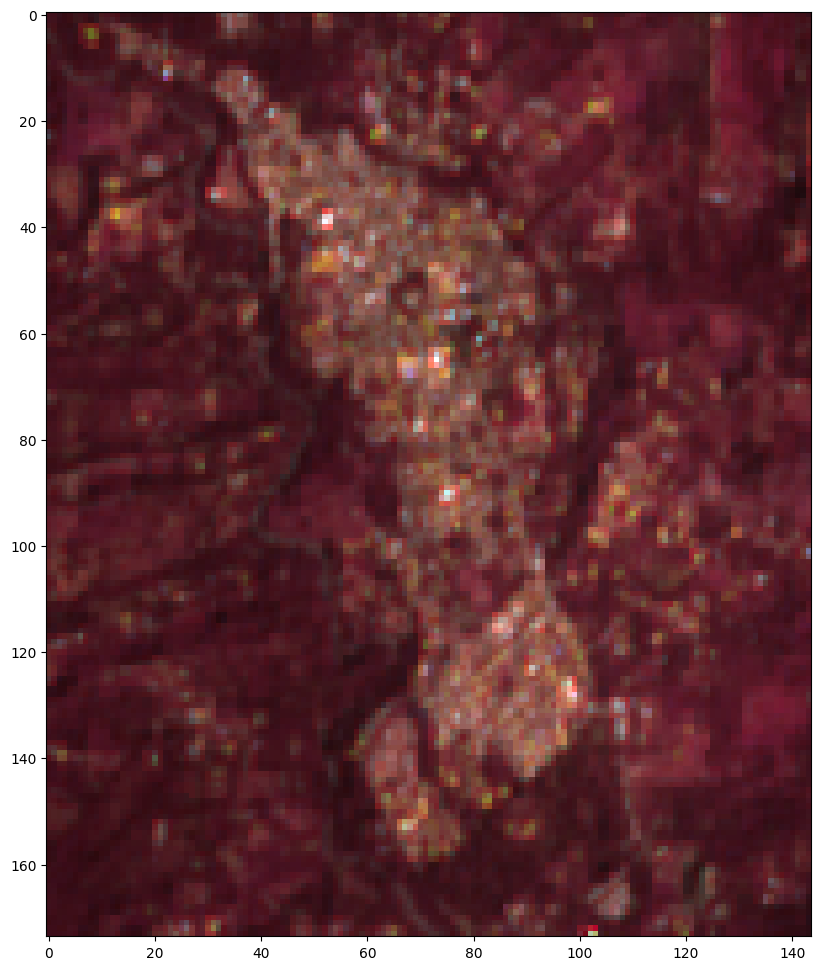

In [16]:
composicion = np.dstack((banda_rojo_norm, banda_verde_norm, banda_azul_norm))
plt.subplots(figsize = (12, 12))
plt.imshow(composicion)

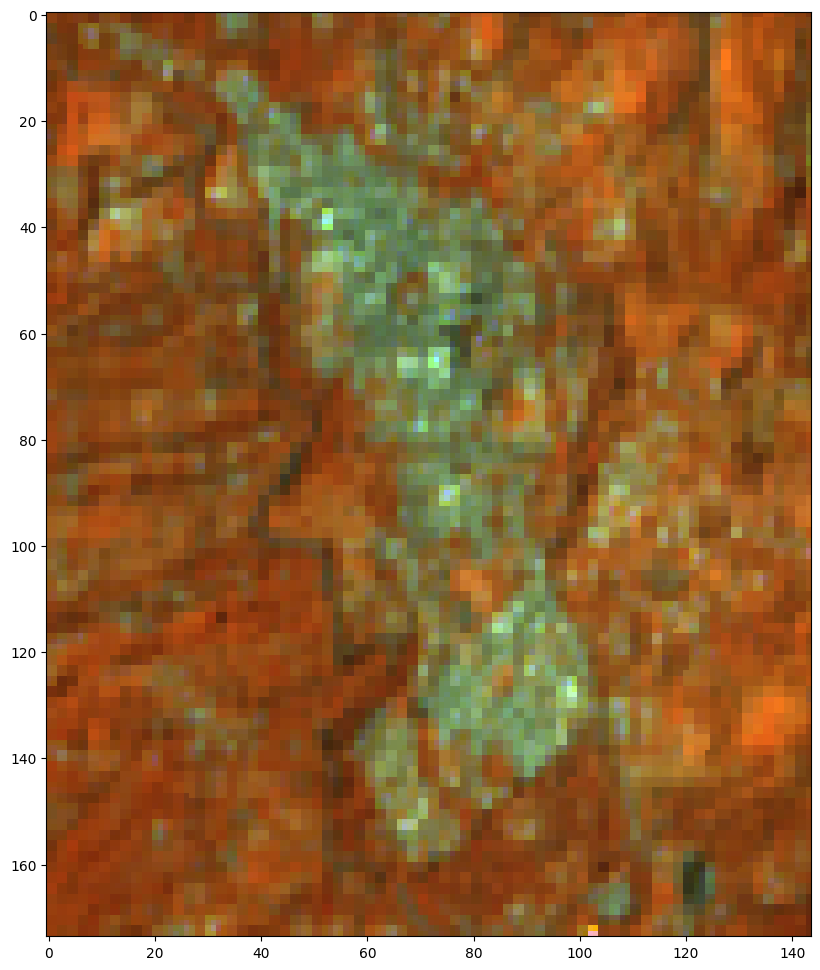

In [17]:
composicion = np.dstack((banda_infrarojo_norm, banda_rojo_norm, banda_verde_norm))
plt.subplots(figsize = (12, 12))
plt.imshow(composicion)

In [18]:
NDVI = ((banda_infrarojo_norm - banda_rojo_norm) / (banda_infrarojo_norm + banda_rojo_norm))

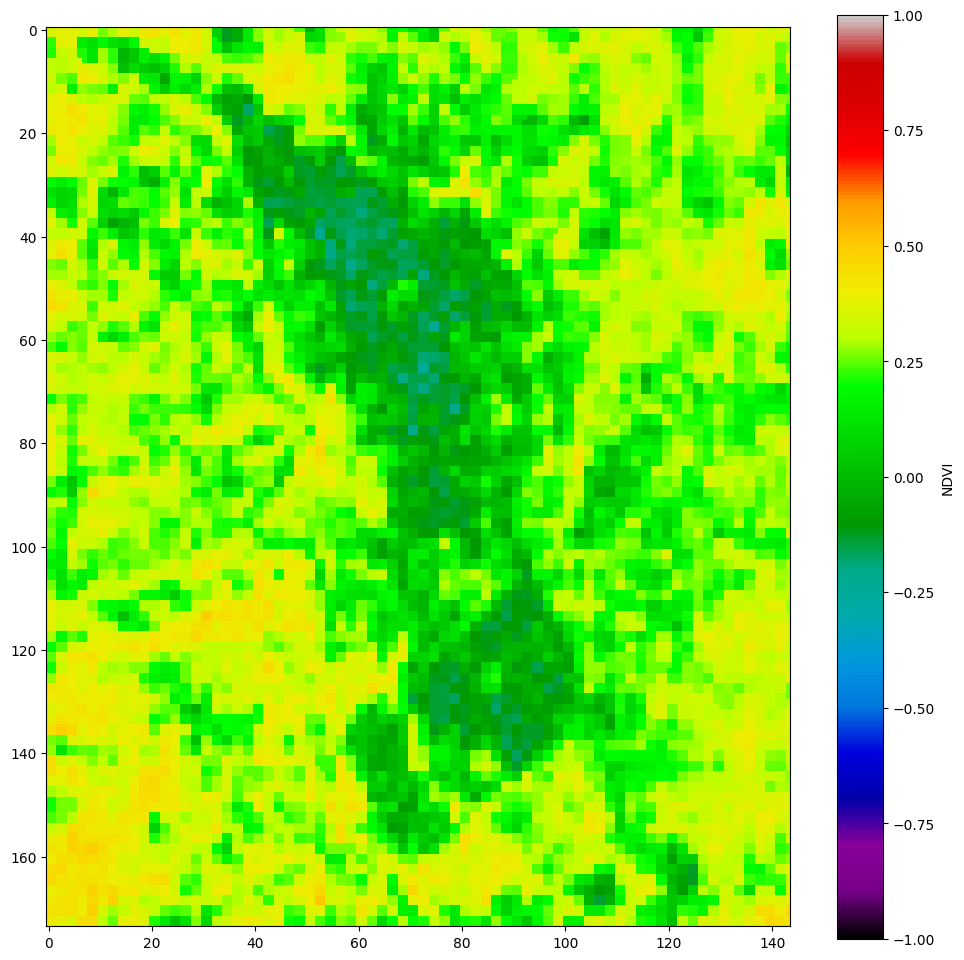

In [19]:
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI, cmap='nipy_spectral', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')

# Filtro de Suavizado (Media o Gaussiano)

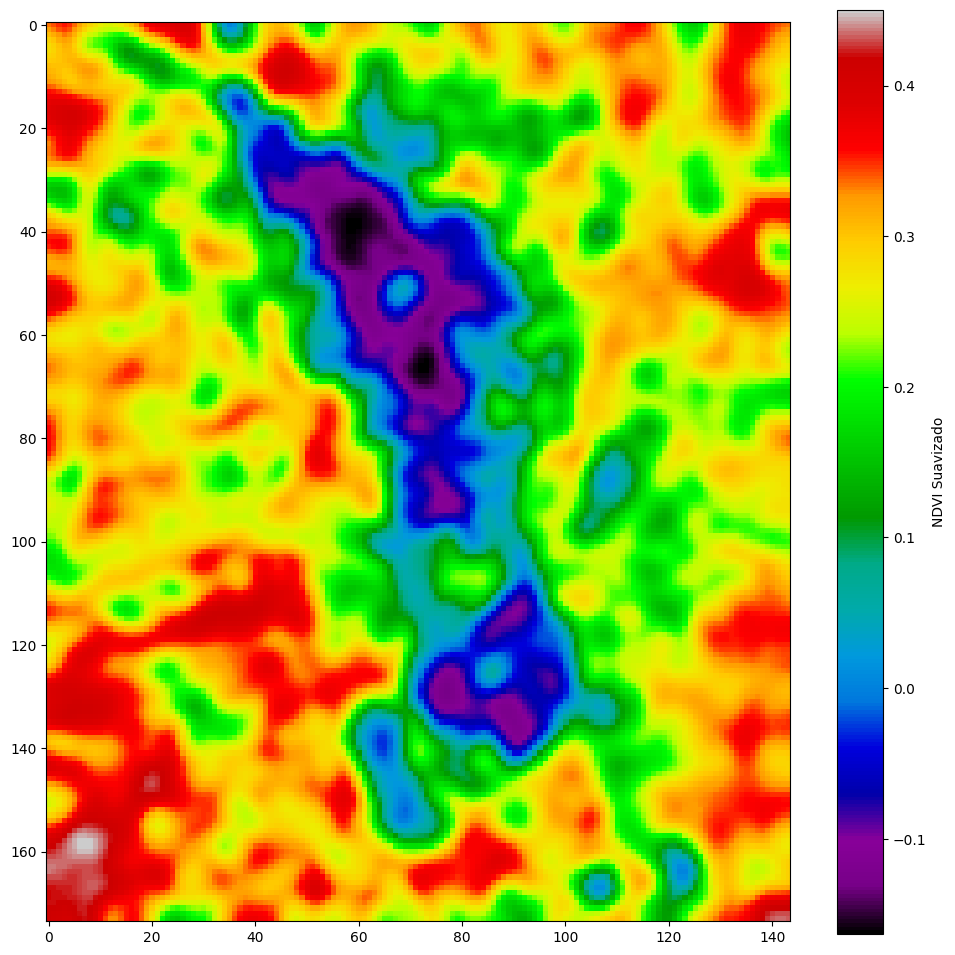

In [20]:
from scipy.ndimage import gaussian_filter

# Suavizar la banda del NDVI
NDVI_suavizado = gaussian_filter(NDVI, sigma=2)  # sigma controla el grado de suavizado
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_suavizado, cmap='nipy_spectral')
plt.colorbar(label='NDVI Suavizado')

# Filtro Laplaciano (Realce de Bordes)

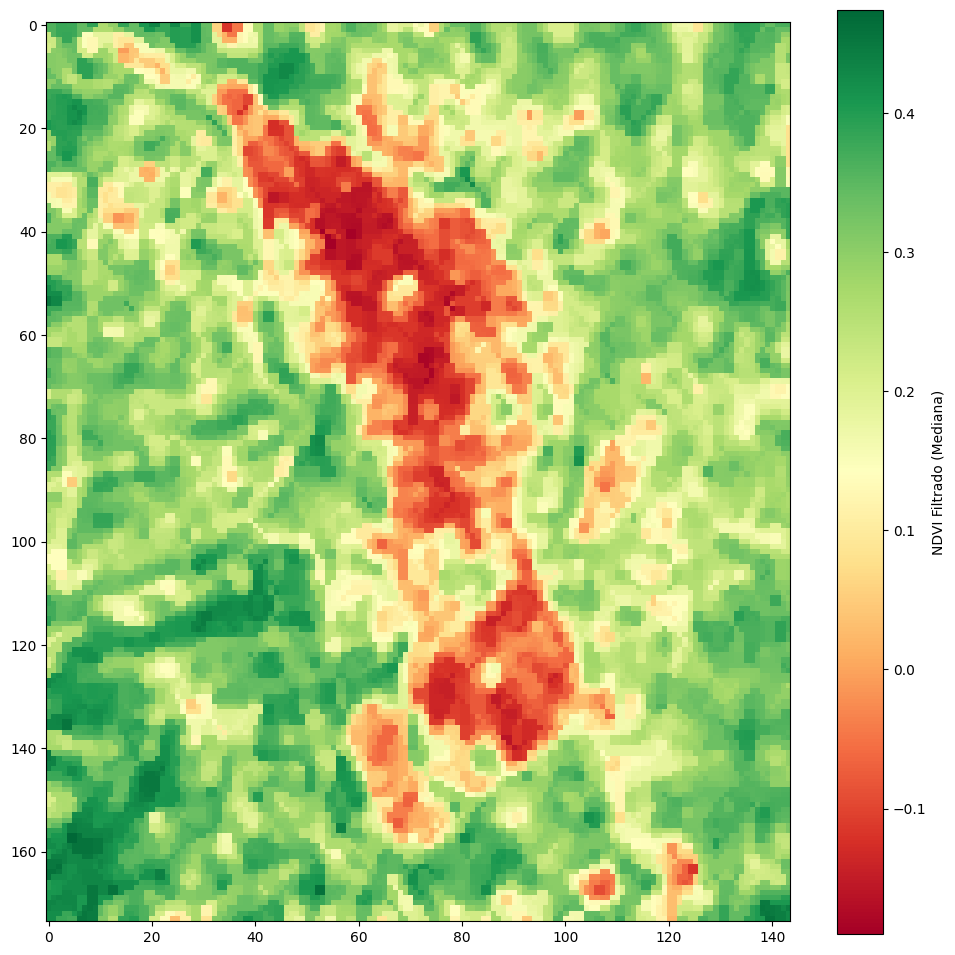

In [21]:
from scipy.ndimage import median_filter

NDVI_mediana = median_filter(NDVI, size=3)
plt.subplots(figsize = (12, 12)) # tamaño del filtro
plt.imshow(NDVI_mediana, cmap='RdYlGn')
plt.colorbar(label='NDVI Filtrado (Mediana)')

In [22]:
def load_image(file_path):
    # Cargar imagen y extraer bandas
    imagen_satelital = rasterio.open(file_path)
    bandas = {i: imagen_satelital.read(i) / imagen_satelital.read(i).max() for i in range(1, 8)}
    return bandas

def calculate_ndvi(bandas):
    # Cálculo del NDVI
    banda_infrarojo = bandas[5]  # Verifica que sea la banda correcta
    banda_rojo = bandas[4]
    NDVI = (banda_infrarojo - banda_rojo) / (banda_infrarojo + banda_rojo)
    return NDVI

def apply_filter(image, filter_type='gaussian', **kwargs):
    # Aplicar filtro basado en el tipo
    if filter_type == 'gaussian':
        return gaussian_filter(image, sigma=kwargs.get('sigma', 2))
    elif filter_type == 'median':
        return median_filter(image, size=kwargs.get('size', 3))
    elif filter_type == 'laplace':
        return laplace(image)
    else:
        raise ValueError("Filtro no reconocido")

def plot_image(image, cmap='RdYlGn', title=''):
    # Mostrar la imagen procesada
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.colorbar(label=title)
    plt.title(title)
    plt.show()

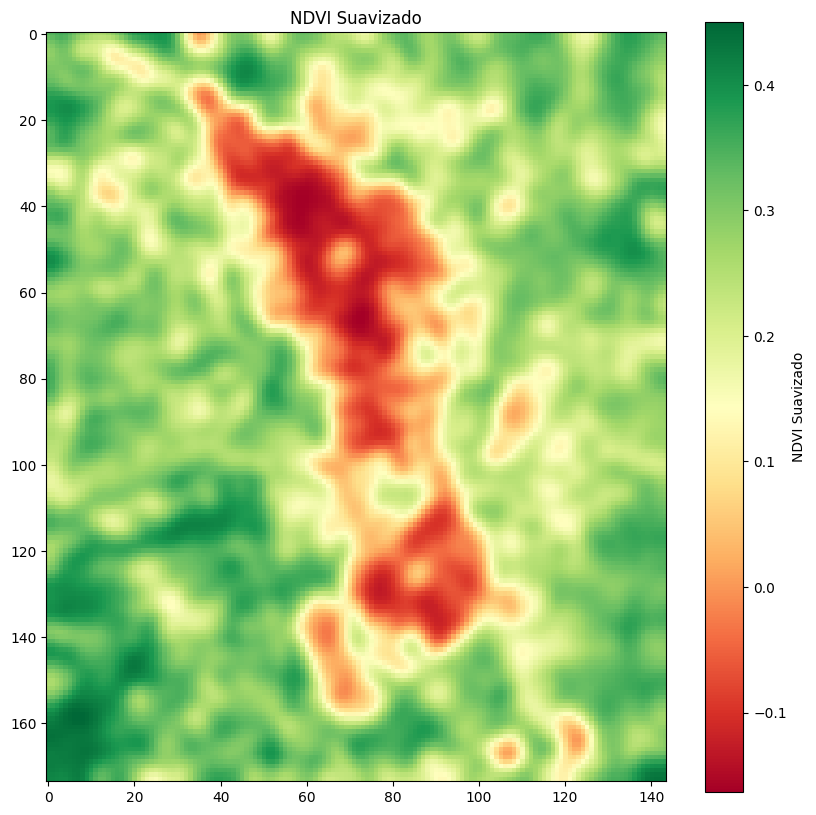

In [23]:
# 1. Cargar las bandas
file_path = "/content/drive/MyDrive/proyecto2/TIFF3/SanFrasico_banda2020_2_13_4.tif"
bandas = load_image(file_path)

# 2. Calcular el NDVI
NDVI = calculate_ndvi(bandas)

# 3. Aplicar un filtro (por ejemplo, suavizado gaussiano)
NDVI_suavizado = apply_filter(NDVI, filter_type='gaussian', sigma=2)

# 4. Visualizar el NDVI procesado
plot_image(NDVI_suavizado, cmap='RdYlGn', title='NDVI Suavizado')


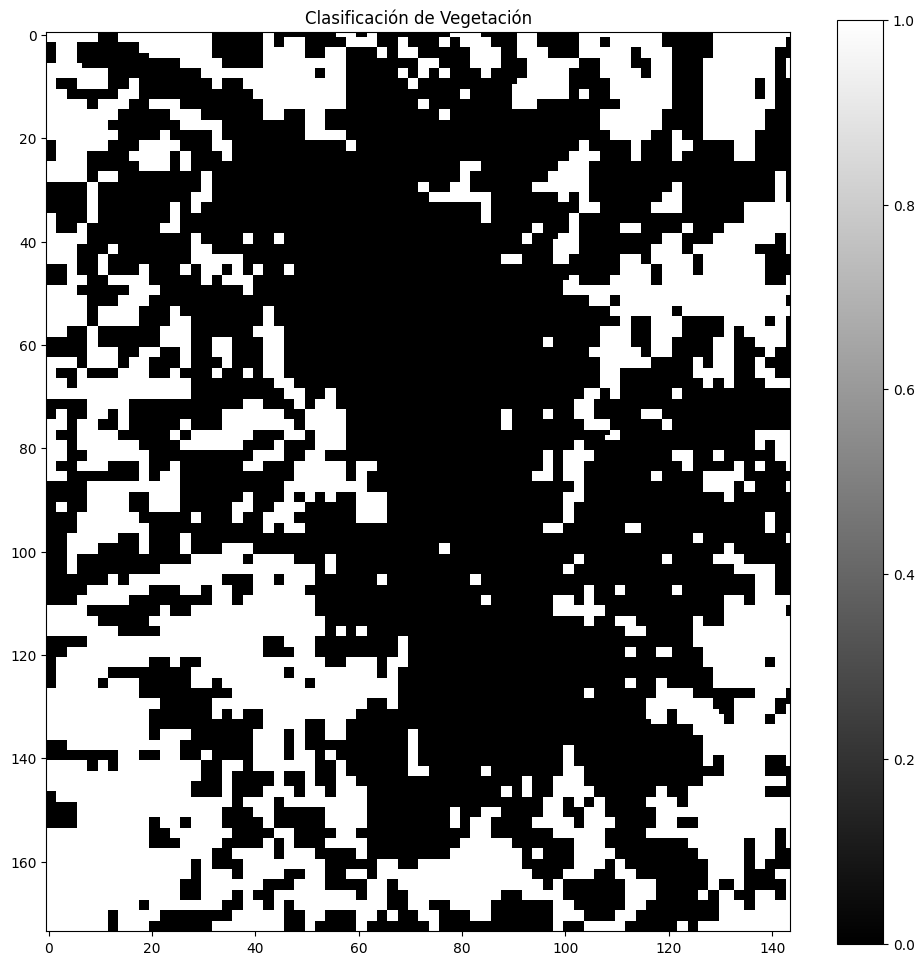

In [24]:
NDVI_clasificado = np.where(NDVI > 0.3, 1, 0)  # Umbral de 0.3
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_clasificado, cmap='gray')
plt.title("Clasificación de Vegetación")
plt.colorbar()

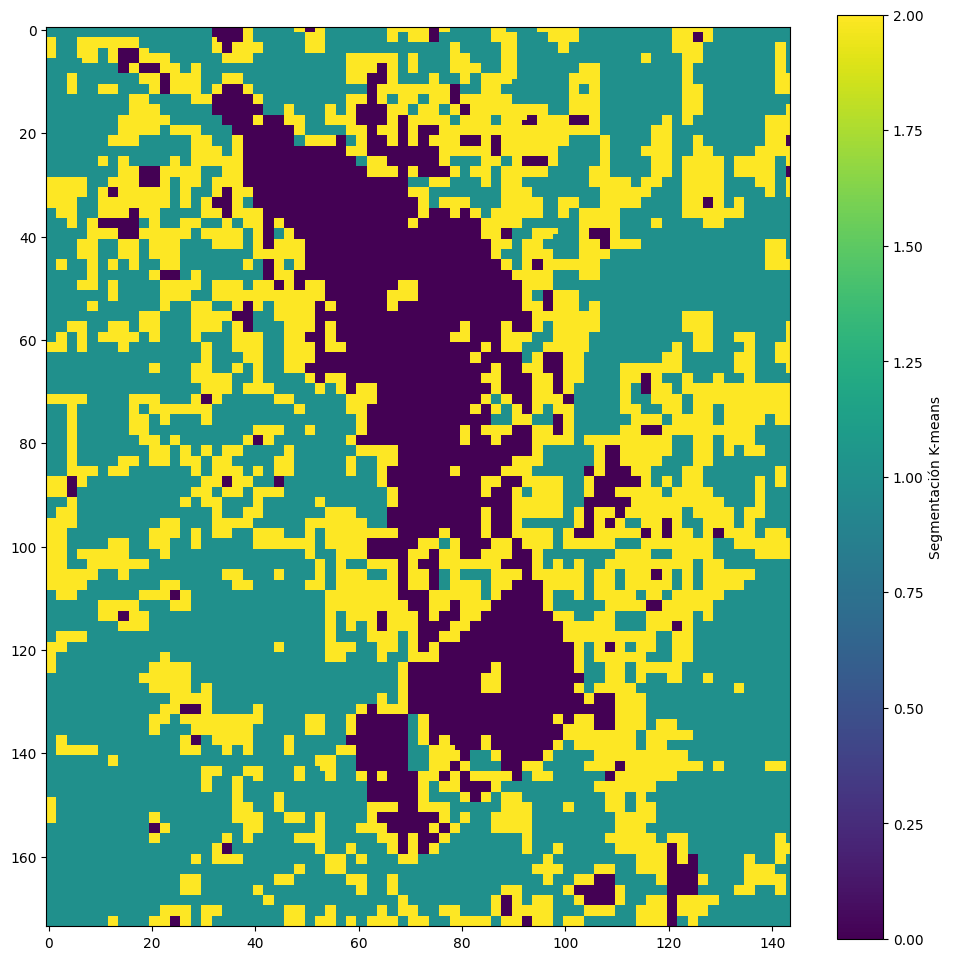

In [25]:
from sklearn.cluster import KMeans

NDVI_flat = NDVI.flatten().reshape(-1, 1)  # Aplanar
kmeans = KMeans(n_clusters=3, random_state=0).fit(NDVI_flat)
NDVI_segmentado = kmeans.labels_.reshape(NDVI.shape)
plt.subplots(figsize = (12, 12))
plt.imshow(NDVI_segmentado, cmap='viridis')
plt.colorbar(label='Segmentación K-means')


In [26]:
MNDWI = ((banda_verde_norm - banda_infrarojo_norm) / (banda_verde_norm + banda_infrarojo_norm))
MNDWI

array([[-0.77783687, -0.77855791, -0.75444654, ..., -0.75832529,
        -0.80733779, -0.76891842],
       [-0.76282894, -0.76282894, -0.78565173, ..., -0.72025321,
        -0.78881284, -0.72048966],
       [-0.65298406, -0.71326274, -0.80398509, ..., -0.69151393,
        -0.72093319, -0.65768744],
       ...,
       [-0.84880238, -0.83193028, -0.82548651, ..., -0.79324547,
        -0.78354138, -0.76459987],
       [-0.83060511, -0.83615933, -0.82539582, ..., -0.80043162,
        -0.79383269, -0.78473522],
       [-0.83546321, -0.83825086, -0.82389365, ..., -0.82391522,
        -0.7824002 , -0.76902226]])

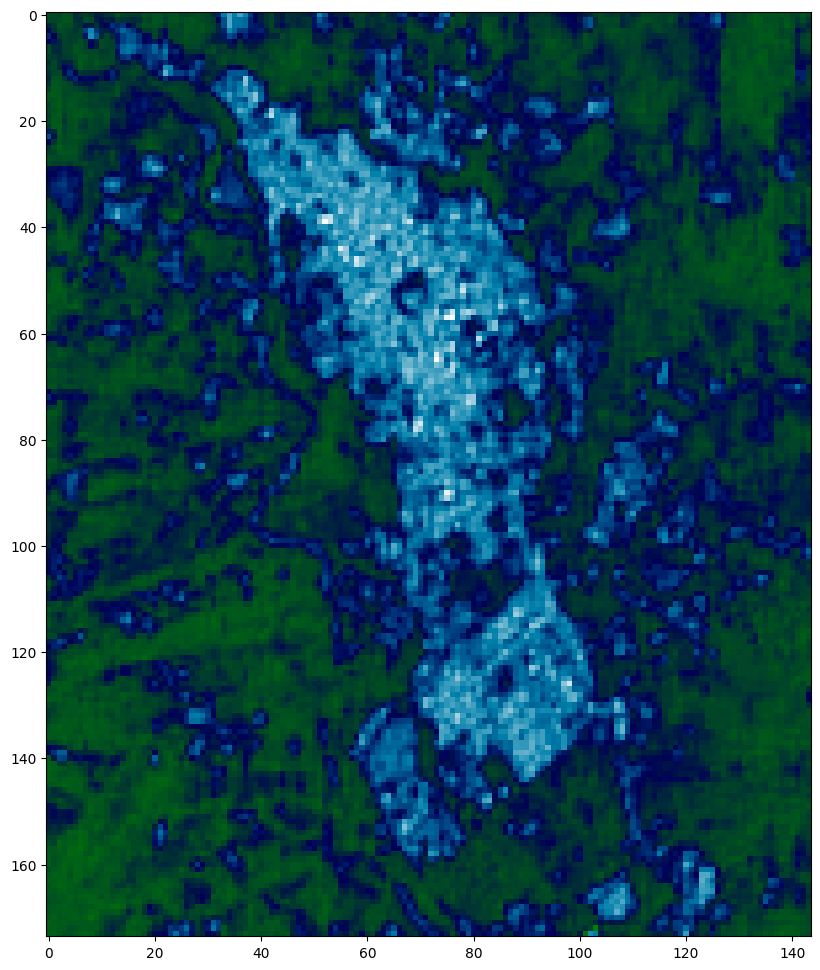

In [27]:
plt.subplots(figsize = (12, 12))
plt.imshow(MNDWI, cmap = 'ocean')

In [28]:
arcilla = banda_swir1_norm / banda_swir2_norm
arcilla

array([[1.07473433, 1.05809548, 0.93817333, ..., 1.02572866, 1.12591036,
        1.03052542],
       [1.22445053, 1.14648141, 1.14419486, ..., 1.04512519, 1.26129639,
        1.0495569 ],
       [1.07641258, 0.99476851, 1.27762472, ..., 1.02551548, 1.18151863,
        1.15517011],
       ...,
       [1.31817261, 1.10289419, 0.97645539, ..., 0.97508792, 0.99474184,
        0.89814599],
       [1.13309996, 1.07707137, 1.07412135, ..., 1.0618502 , 1.15131317,
        1.16677287],
       [1.07541992, 1.14793597, 1.13432737, ..., 1.16183371, 1.14905126,
        1.12764933]])

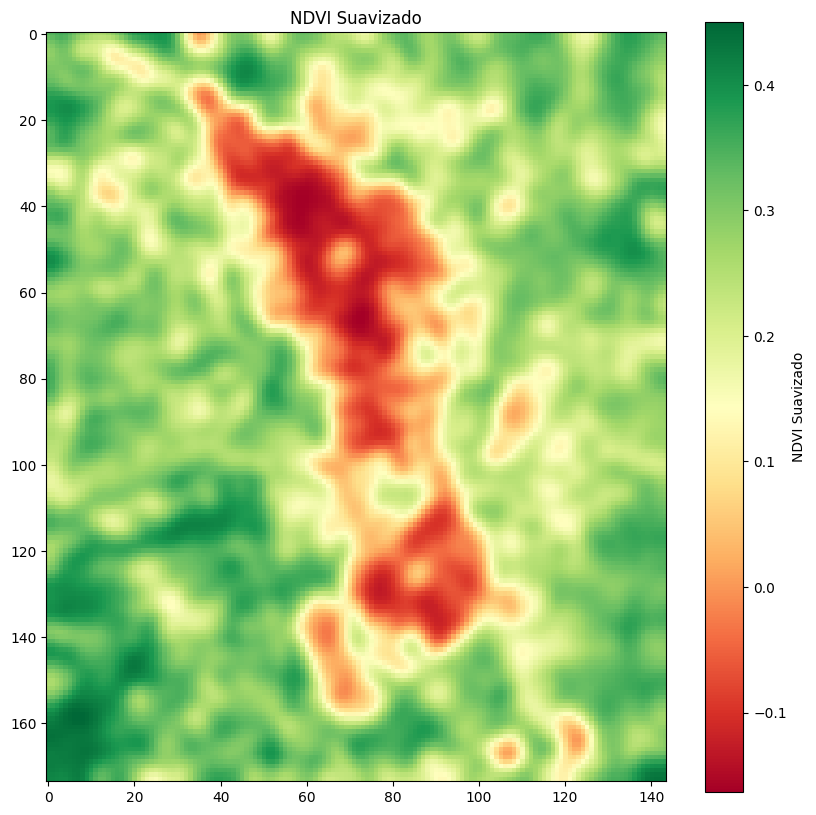

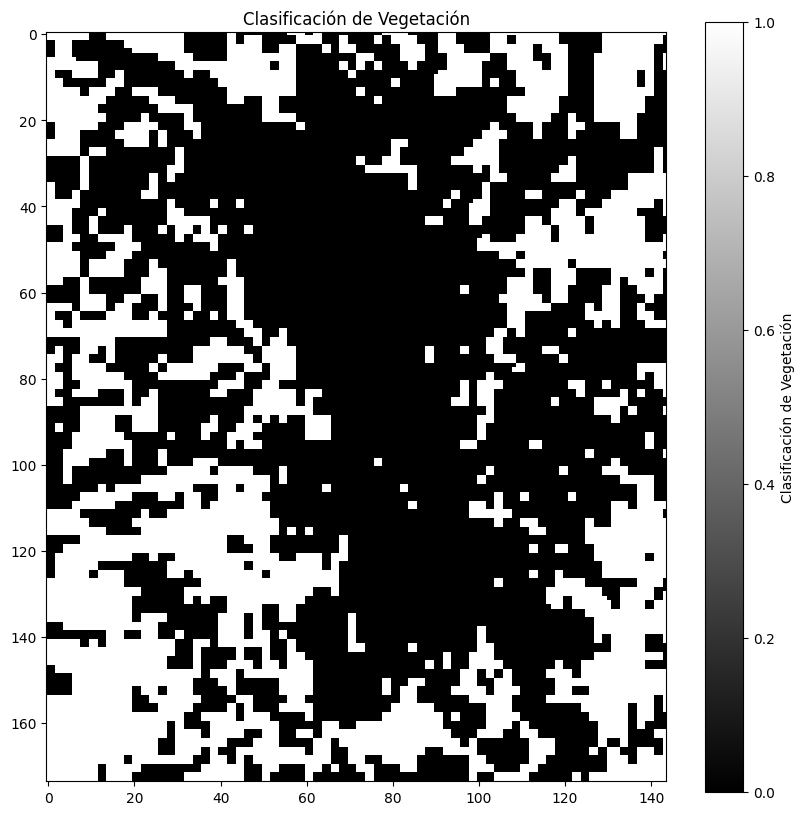

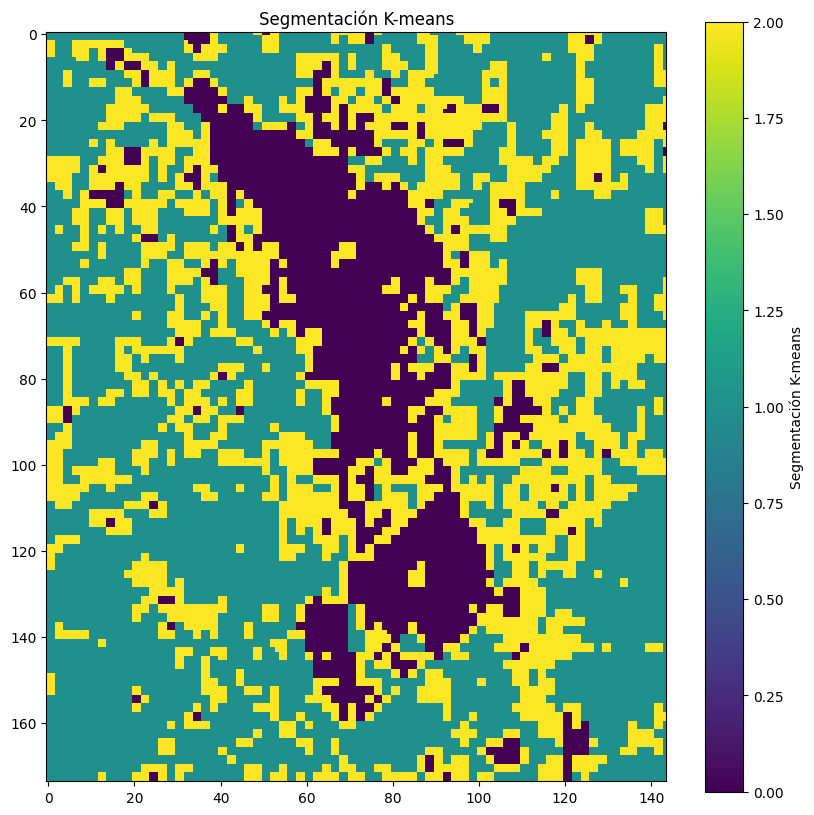

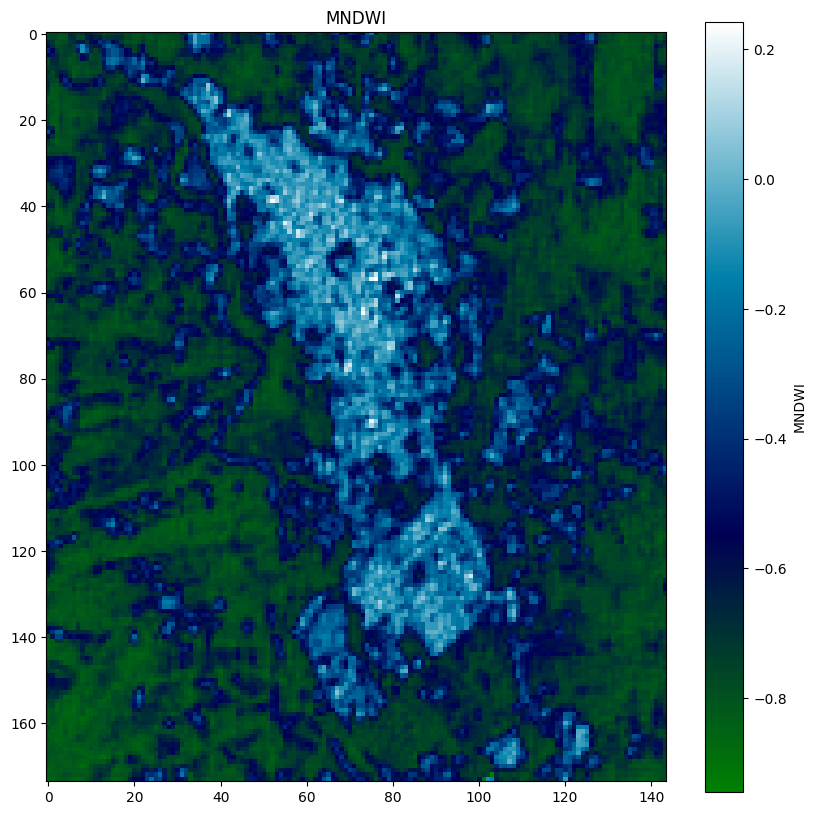

In [29]:
import ee
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter
from sklearn.cluster import KMeans


ee.Initialize()





def process_image(file_path):
    """
    Processes a single satellite image.

    Args:
      file_path: Path to the GeoTIFF file.

    Returns:
      A dictionary containing processed image data (NDVI, classifications, etc.)
    """
    try:
      # 1. Load Bands
      bandas = load_image(file_path)

      # 2. Calculate NDVI
      NDVI = calculate_ndvi(bandas)

      # 3. Apply Filters
      NDVI_suavizado = apply_filter(NDVI, filter_type='gaussian', sigma=2)
      NDVI_mediana = apply_filter(NDVI, filter_type='median', size=3)


      # 4. Classify Vegetation (Example threshold)
      NDVI_clasificado = np.where(NDVI > 0.3, 1, 0)

      # 5. Segmentation with K-Means
      NDVI_flat = NDVI.flatten().reshape(-1, 1)
      kmeans = KMeans(n_clusters=3, random_state=0).fit(NDVI_flat)
      NDVI_segmentado = kmeans.labels_.reshape(NDVI.shape)


      # 6. Calculate MNDWI
      MNDWI = ((bandas[3] - bandas[5]) / (bandas[3] + bandas[5])) # Assuming correct band indices

      # 7. Calculate Clay Ratio
      arcilla = bandas[6] / bandas[7]


      # 8. Store processed data
      processed_data = {
          "NDVI": NDVI,
          "NDVI_suavizado": NDVI_suavizado,
          "NDVI_mediana": NDVI_mediana,
          "NDVI_clasificado": NDVI_clasificado,
          "NDVI_segmentado": NDVI_segmentado,
          "MNDWI": MNDWI,
          "clay_ratio": arcilla
      }
      return processed_data


    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Example usage for a list of images
image_files = ["/content/drive/MyDrive/proyecto2/TIFF3/SanFrasico_banda2020_2_13_4.tif",
              # Add other image paths here
              ]


for file in image_files:
    results = process_image(file)
    if results:
        # Now you can access the processed data (e.g., results["NDVI"])
        plot_image(results["NDVI_suavizado"], cmap='RdYlGn', title='NDVI Suavizado')
        plot_image(results["NDVI_clasificado"], cmap='gray', title='Clasificación de Vegetación')
        plot_image(results["NDVI_segmentado"], cmap='viridis', title='Segmentación K-means')
        plot_image(results["MNDWI"], cmap='ocean', title='MNDWI')
        # ...  Process other results as needed ...